In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\KNN

19-01-2022  19:23    <DIR>          .
19-01-2022  00:27    <DIR>          ..
19-01-2022  18:49    <DIR>          .ipynb_checkpoints
19-01-2022  00:26            10,053 glass.csv
19-01-2022  00:27               550 problem_statement(Glass).txt
19-01-2022  00:26                62 Problem_Statement(Zoo).txt
19-01-2022  19:23            10,867 Untitled.ipynb
19-01-2022  00:26             4,600 Zoo.csv
               5 File(s)         26,132 bytes
               3 Dir(s)  202,067,632,128 bytes free


## Glass

In [3]:
glass = pd.read_csv('glass.csv')

In [4]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [134]:
array = glass.values

In [135]:
X = array[:,0:9]
Y = array[:,9]

In [136]:
X = (X - X.min(axis = 0))/(X.max(axis = 0) - X.min(axis = 0))

In [137]:
kfold = KFold(n_splits = 20)
model = KNeighborsClassifier(n_neighbors = 5)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.5518181818181819


### Grid Search

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
n_neighbors = np.array(range(2,40))
param_grid = dict(n_neighbors = n_neighbors)

In [140]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])})

In [141]:
print(grid.best_score_)
print(grid.best_params_)

0.6311184939091916
{'n_neighbors': 5}


### Visualisation

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
k_range = range(2,10)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv =5)
    k_scores.append(scores.mean())

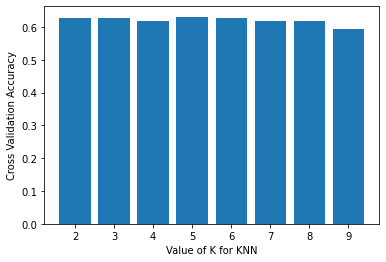

In [144]:
plt.bar(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.xticks(k_range)
plt.ylabel('Cross Validation Accuracy')
plt.show()

## Zoo

In [145]:
zoo = pd.read_csv('zoo.csv')

In [146]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [147]:
zoo.shape

(101, 18)

In [148]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [149]:
X = zoo.iloc[:,1:17]
Y = zoo.iloc[:,17]

In [150]:
X = (X - X.min(axis = 0))/X.max(axis = 0)

In [151]:
kfold = KFold(n_splits = 20)
model = KNeighborsClassifier(n_neighbors = 5)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.95


### Grid Search

In [152]:
n_neighbors = np.array(range(2,10))
param_grid = dict(n_neighbors = n_neighbors)

In [153]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid =param_grid, cv = 4)
grid.fit(X, Y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [154]:
print(grid.best_score_)
print(grid.best_params_)

0.9503846153846154
{'n_neighbors': 5}


### Visualisation

In [155]:
k_range = range(2,10)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv = 4)
    k_scores.append(scores.mean())

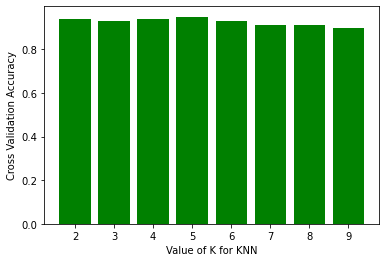

In [159]:
plt.bar(k_range, k_scores, color = 'green')
plt.xlabel('Value of K for KNN')
plt.xticks(k_range)
plt.ylabel('Cross Validation Accuracy')
plt.show()